#  __Contexto:__


-  Este conjunto de datos, provisto por la pagina kagle.com,  proporciona un análisis, del desempeño y las características de los futbolistas en diversas ligas globales durante las temporadas 2021-2022 y 2022-2023. Incluye una variedad de datos, desde detalles básicos como la edad y la posición de juego, hasta estadísticas profesionales como goles, asistencias y lesiones.

# ___Regla de las Tres W___

*   __(What)__ ¿Qué pasó? Investigación sobre la influencia de la edad en la vida útil de los jugadores de fútbol.

*  __(Why)__ ¿Por qué pasó? Importancia estratégica de la variable "edad" en el rendimiento y la valoración de los jugadores.


*  __(Who)__ ¿Qué podemos hacer al respecto? Implicaciones para la toma de decisiones en la gestión y el negocio del fútbol.

___Introducción:___

*  La edad de los futbolistas ha sido objeto de interés y debate en el mundo del fútbol durante décadas. Más allá de ser simplemente un número, la edad puede influir significativamente en diversos aspectos del desempeño y la carrera de un jugador. 

*  A continuacion analizaremos la cantidad de goles y asistencias, evaluando el promedio por partido, y haciendo foco en la edad del jugador, discriminado por rangos de edades. 

*  Rangos
    * 'Menor a 20', 
    * '20 a 25',
    * '25 a 30', 
    * '30 a 35',
    * 'Mayor a 35'


* __Cuestiones a tratar__:

*  La cuestión fundamental que abordaremos es cómo la edad puede ser un factor determinante en el éxito y la longevidad de los futbolistas en el ámbito profesional. Exploraremos si existe una correlación entre la edad de los jugadores y su rendimiento en el campo (goles y asistencias), así como la  valoración en el mercado.

*   Trabajaremos el dataset, y haremos las modificaciones necesarias, para poder llegar a conclusiones, que ayuden a tomar decisiones, siempre teniendo en cuenta la vision de negocio.

*    Tendremos en cuenta, dos situaciones a analizar para luego tener consideraciones finales.

*   __Desempeño en el campo__
*   __Valor y potencial__

In [1]:
# importamos las librerias clasicas a utlizar
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 

In [2]:
#leo el df
df=pd.read_csv("./data.csv")

# empiezo a filtrar las columnas que voy a usar.
df_total=df[['Posicion','Apariciones','Edad','Goles','Asistencias','Valor Actual','Valor Maximo']]

# creo un filtro para que el data frame no tenga en cuenta a los arqueros.
df_total = df_total.loc[df_total['Posicion'] != 'Goalkeeper']

#paso la edad a entero
df_total['Edad'] = df_total['Edad'].astype(int)

# para que no tenga tantas sub-posiciones, me interesa, defensores, medios, y delanteros
df_total['Posicion']= df_total['Posicion'].str.extract(r'^\s*([^\s-]+)')

# Calcular la media de las apariciones (para que la medida sea lo mas representativa)
media_apariciones = df_total['Apariciones'].median()

# Filtrar el DataFrame para jugadores con igual o más apariciones que la media
df_total= df_total[df_total['Apariciones'] >= media_apariciones]


# voy a crear rangos de edades.
bins = [0, 20, 25, 30, 35, float('inf')] 

# etiquetas para cada rango de edad
labels = [' Menor a 20', '20 a 25', '25 a 30', '30 a 35', 'Mayor a 35']

# Creo  una nueva columna 'Grupo de Edad'
df_total['Grupo de Edad'] = pd.cut(df_total['Edad'], bins=bins, labels=labels, right=False)


# un df por cada posicion

# defensores
defensores = df_total.loc[df_total['Posicion'] == 'Defender']

# mediocampistas
mediocampistas=df_total.loc[df_total['Posicion'] == 'midfield']

# delanteros
delanteros=df_total.loc[df_total['Posicion'] == 'Attack']


In [3]:
# creo una funcion que dado un df, me crea un grafico con las especificaciones dadas
# Crear un gráfico de barras agrupadas por 'Grupo de Edad' con el promedio de 'Goles' y 'Asistencias'
def grafico_promedio_goles_asistencias(df):
    
    # Establecer el estilo de seaborn
    sns.set_style("whitegrid")

    
    plt.figure(figsize=(16, 12))

    # Ordenar los grupos de edad de menor a mayor
    edades = sorted(df['Grupo de Edad'].unique())

    # Obtener los datos del DataFrame
    promedio_goles = df.groupby('Grupo de Edad')['Goles'].mean().reindex(edades)
    promedio_asistencias = df.groupby('Grupo de Edad')['Asistencias'].mean().reindex(edades)

    # Establecer el ancho de las barras
    bar_width = 0.35

    # Calcular las posiciones para las barras de goles y asistencias
    bar_positions_goles = list(range(len(edades)))
    bar_positions_asistencias = [pos + bar_width for pos in bar_positions_goles]

    # Crear las barras de goles
    plt.bar(bar_positions_goles, promedio_goles, bar_width, color='skyblue', label='Promedio de Goles')

    # Crear las barras de asistencias
    plt.bar(bar_positions_asistencias, promedio_asistencias, bar_width, color='orange', label='Promedio de Asistencias')

    # Obtener el nombre del DataFrame, para poner el nombre que corresponda cuando lo llame en el general
    nombre_df = df.name if hasattr(df, 'name') else [name for name, var in globals().items() if var is df][0]
    nombre_df=nombre_df.upper()
    
    # Personalizar el gráfico
    plt.title(f'Promedio de Goles y Asistencias por Grupo de Edad de {nombre_df}')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Promedio')
    plt.xticks([pos + bar_width / 2 for pos in bar_positions_goles], edades)  
    plt.legend() 

    # Agregar grid
    plt.grid(True, linestyle='--', alpha=0.5) 

    # Rotar etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)

    
    # Mostrar el gráfico
    plt.show()
    

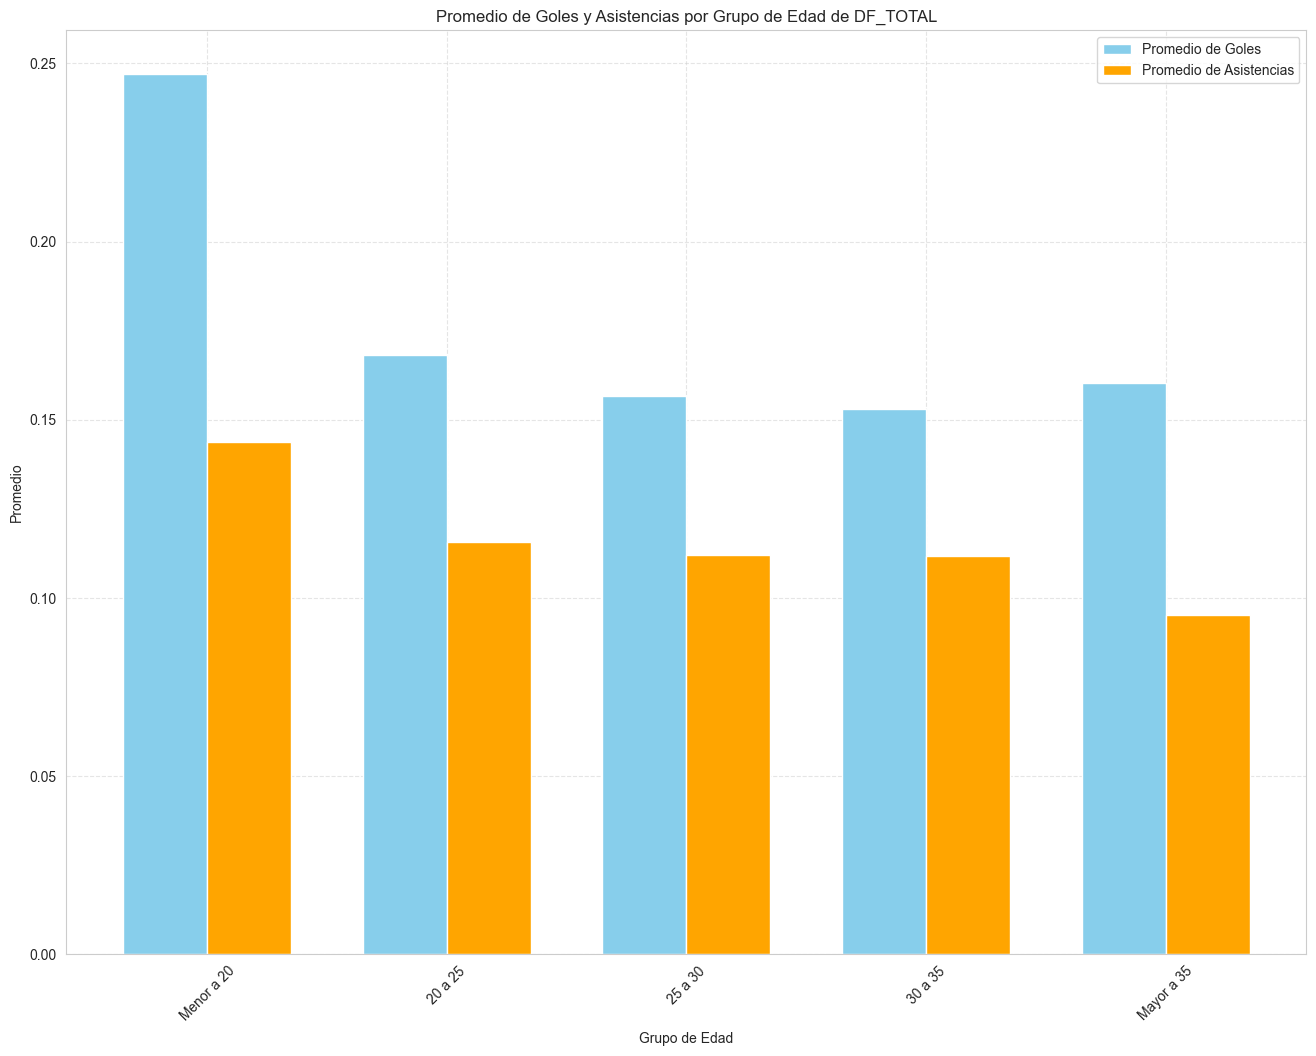

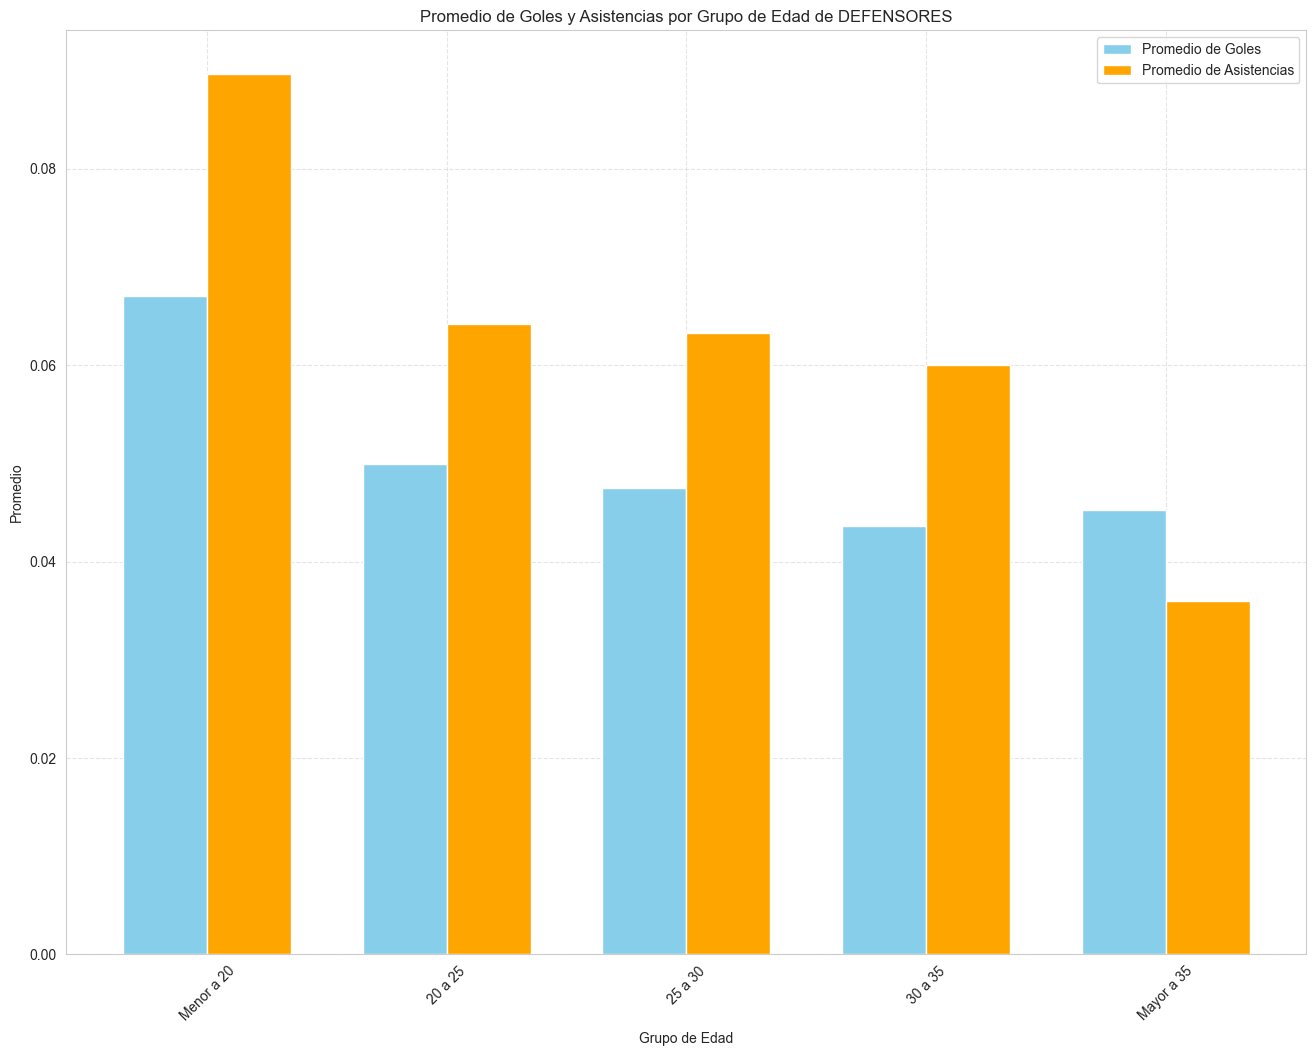

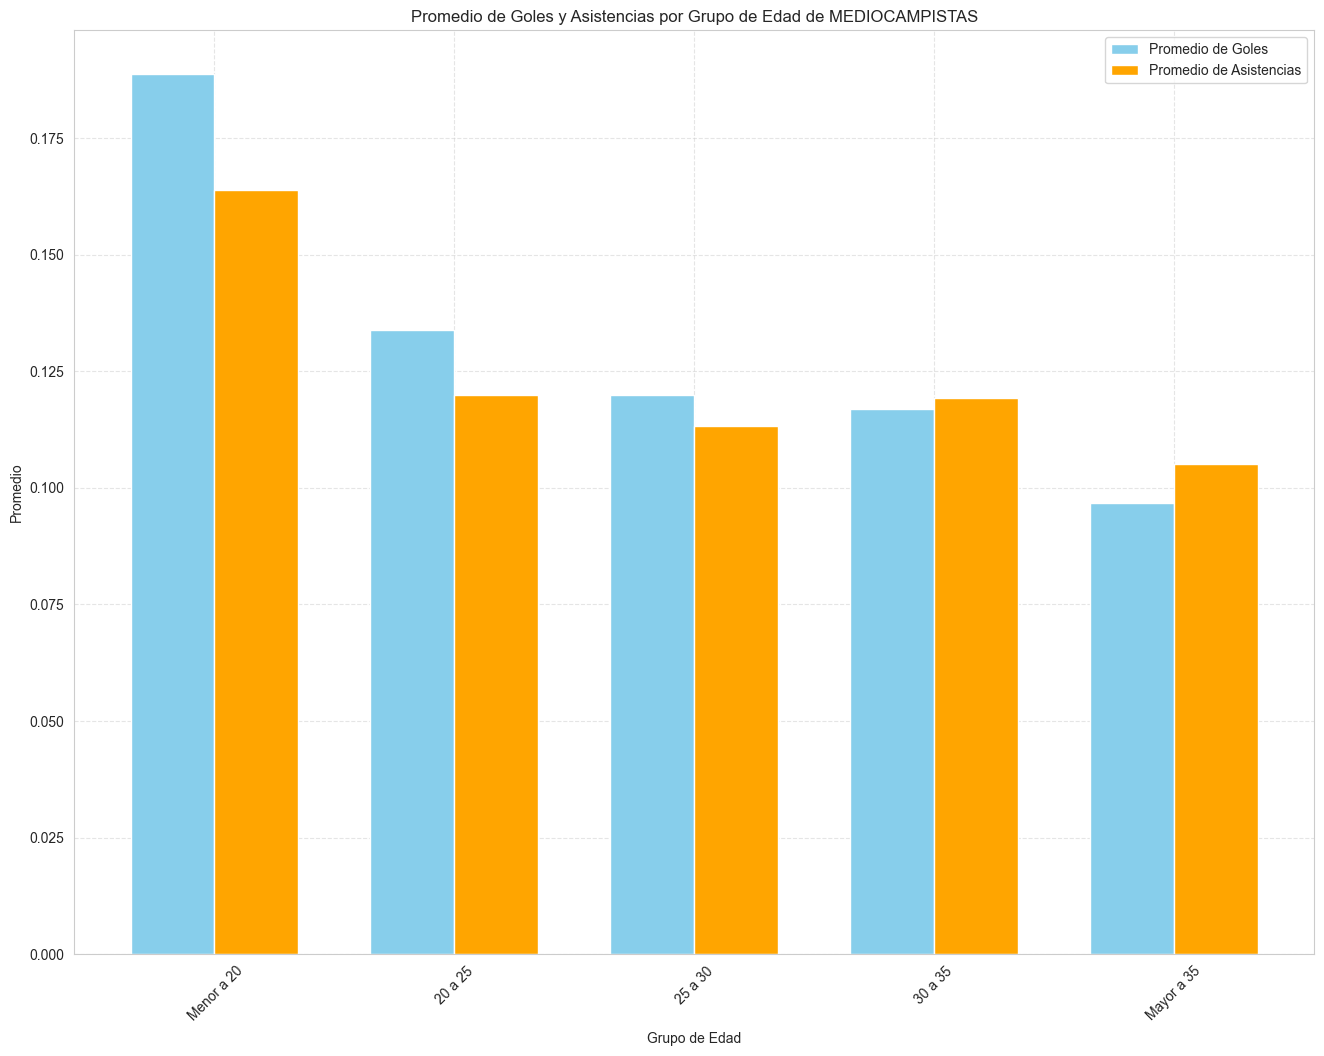

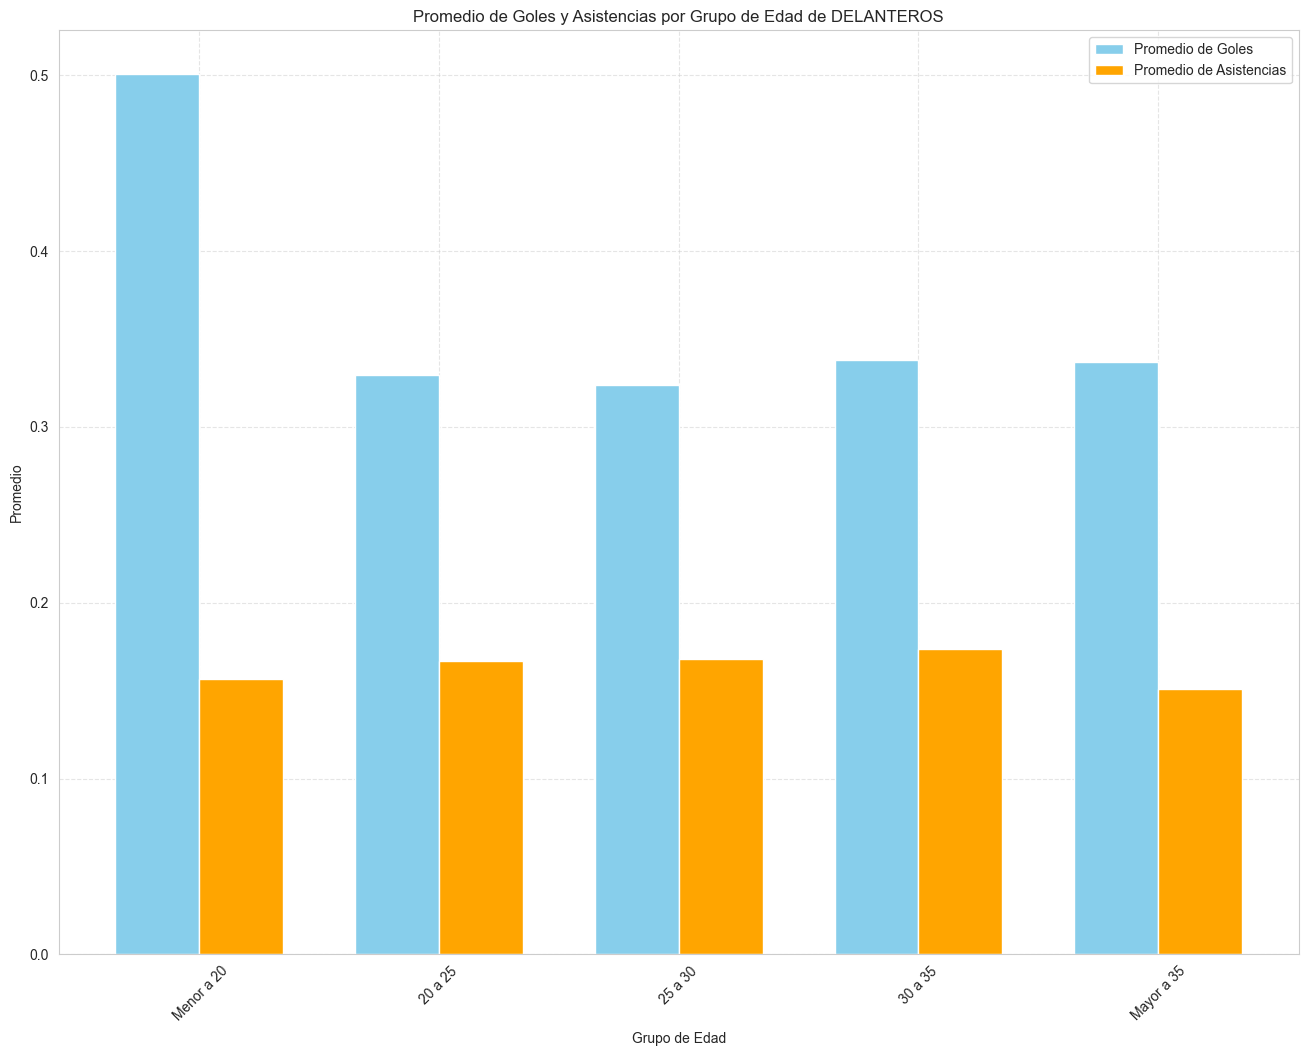

In [4]:
# llamados a la funcione
grafico_promedio_goles_asistencias(df_total)  
grafico_promedio_goles_asistencias(defensores) 
grafico_promedio_goles_asistencias(mediocampistas)
grafico_promedio_goles_asistencias(delanteros)    


#   ___Analizando los valores de los Futbolistas___

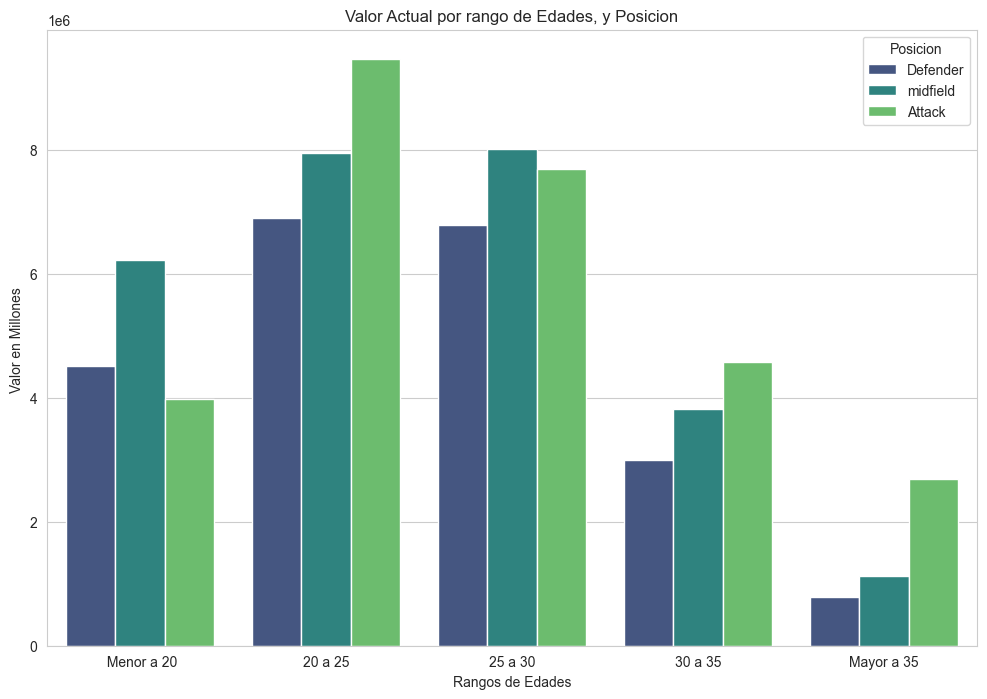

In [52]:
# Ignorar las advertencias de asignación concatenada
pd.options.mode.chained_assignment = None

df_valores=df_total[['Posicion','Valor Actual','Valor Maximo','Grupo de Edad']]
df_valores['Valor Actual']=df_valores['Valor Actual'] /1000000
df_valores['Valor Maximo']=df_valores['Valor Maximo'] /1000000


# Crear un gráfico de barras agrupadas por 'Posicion' y 'Grupo de Edad' con los valores 'Valor Actual' y 'Valor Maximo'
plt.figure(figsize=(12, 8))


sns.barplot(x='Grupo de Edad', y='Valor Actual', hue='Posicion', data=df_total, palette='viridis', errorbar=None)

# Personalizar el gráfico
plt.title('Valor Actual por rango de Edades, y Posicion')
plt.xlabel('Rangos de Edades')
plt.ylabel('Valor promedio en Millones ')
plt.legend(title='Posicion')

# Mostrar el gráfico
plt.show()

#   ___Conclusiones Finales___

* En el informe se tuvieron en cuenta los goles y asistencias, por rango de edad. Tambien, tener en cuenta que solo se tomaron los jugadores que jugaron mas de la media de partidos, ya que el informe tiene promedio de goles por partido, y si  uno, jugo un solo partido, sobre noventa posibles, e hizo 4 goles, el promedio es altisimo, pero no representativo.

______________________________________________________________________________________________________

* Dicho eso,  teniendo en cuenta las tres posiciones juntas (defensores, medioscampitas y delanteros), podemos concluir que,  a menor de 20 años el promedio de goles y asistencias es notoriamente alto, y en los rangos subsiguientes, la medida, si bien disminuye el promedio, son parecidos, con un destaque que a menor edad, mayor promedio de goles y asistencias.


______________________________________________________________________________________________________

*  Luego analizando por separado, o sea por posiciones de campo, sigue la tendencia que la mayor productividad es mientras el jugador es menor a 20, o en el rango siguiente.

*  Ademas, podemos establecer que tanto defensores y mediocampistas la tendencia que tienen mejores productividad en asistencias que goles, y esa particularidad, se invierte en los delanteros que claramente, tienen mas goles que asistencias.
______________________________________________________________________________________________________


* En el grafico final, donde se muestra el valor actual  del pase de los jugadores, podemos concluir que:

*  Exepto en el primer rango de edades siempre el delantero, es el jugador de la cancha mas valioso o caro.

*  La tendencia que en los rango de 20 a 25, y 25 a 30, alcanzan su valor maximo, y pasado esos rangos, empieza a decaer los mismos.

#   _Apreciacion Final_

*  La edad juega un factor clave, a la hora de analizar y comprender la vida util y productiva de un jugador de Futbol.

*  En la etapa de los 18 a 25, alcanzan su pico maximo de valor  y productividad deportiva.

*  Teniendo en cuenta la logica del negocio, para los clubes vendedores o exportadores, (futbol argentino o brasilero), conviene venderlos jovenes, para sacar una mayor ganancia de dinero.

*  En un mercado no tan fuerte o competitivo ( obviamente no considerar al europeo), las oportunidades de compra o negocio, aparecen a partir de pasado los 30 años.